<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/parcial_1/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [24]:
x = sp.symbols('x')

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


def laguerre_polynomial(n):
    return sp.exp(x) / sp.factorial(n) * sp.diff((x**n * sp.exp(-x)), x, n)

def encontrar_raices_laguerre(n):
    L_n = laguerre_polynomial(n)
    raices = sp.nroots(L_n, n=15)
    return np.array(raices, dtype=float)

In [20]:
laguerra = laguerre_polynomial(x)
raiz_1 = encontrar_raices_laguerre(1)
raiz_2 = encontrar_raices_laguerre(2)
raiz_3 = encontrar_raices_laguerre(3)
raiz_4 = encontrar_raices_laguerre(4)
raiz_5 = encontrar_raices_laguerre(5)
print(raiz_1)
print(raiz_2)
print(raiz_3)
print(raiz_4)
print(raiz_5)

[1.]
[0.58578644 3.41421356]
[0.41577456 2.29428036 6.28994508]
[0.32254769 1.7457611  4.5366203  9.39507091]
[ 0.26356032  1.41340306  3.59642577  7.08581001 12.64080084]


In [28]:
#graficar los polinomios y sus raíces
def graficar_laguerre(n):
    x_vals = np.linspace(0, 10, 400)
    L_n = laguerre_polynomial(n)
    L_n_func = sp.lambdify(x, L_n, 'numpy')
    y_vals = L_n_func(x_vals)


    plt.figure()
    plt.plot(x_vals, y_vals, label=f'L_{n}(x)')
    plt.axhline(0, color='black', linewidth=0.8)


    raices = encontrar_raices_laguerre(n)
    plt.scatter(raices, np.zeros_like(raices), color='red', zorder=5, label='Raíces')

    plt.title(f'Polinomio de Laguerre L_{n}(x) y sus raíces')
    plt.xlabel('x')
    plt.ylabel(f'L_{n}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

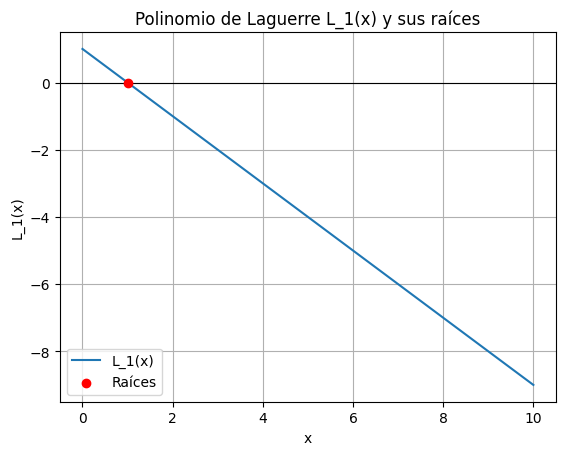

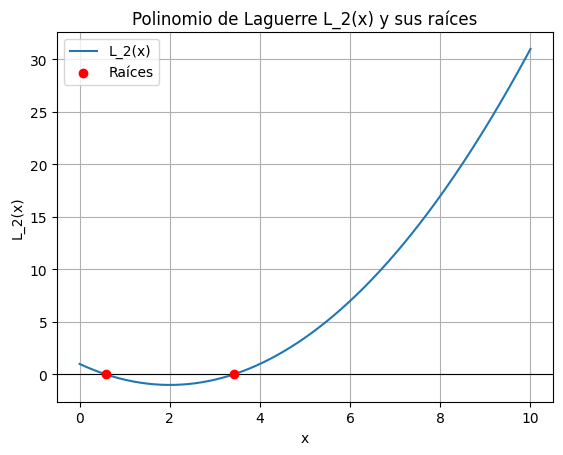

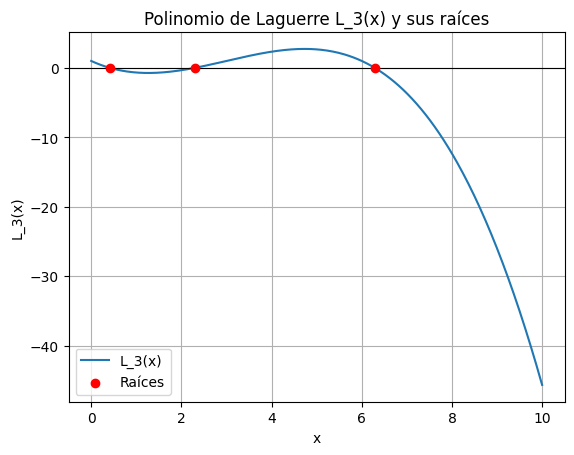

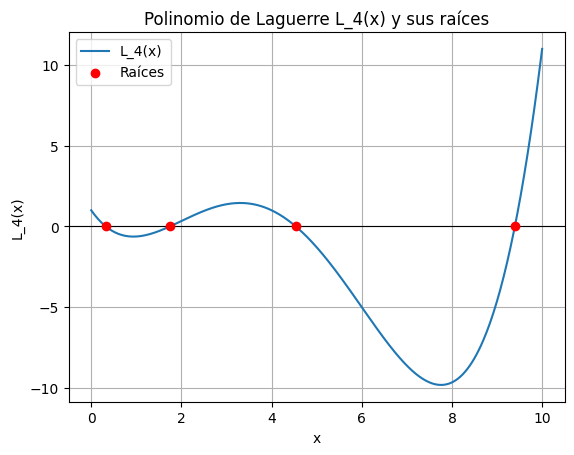

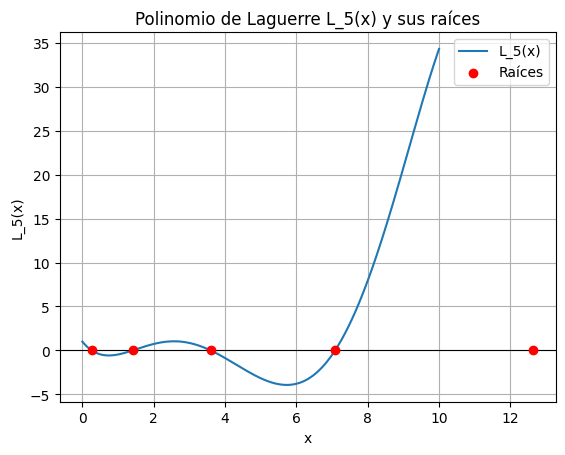

In [27]:
graficar_laguerre(1)
graficar_laguerre(2)
graficar_laguerre(3)
graficar_laguerre(4)
graficar_laguerre(5)

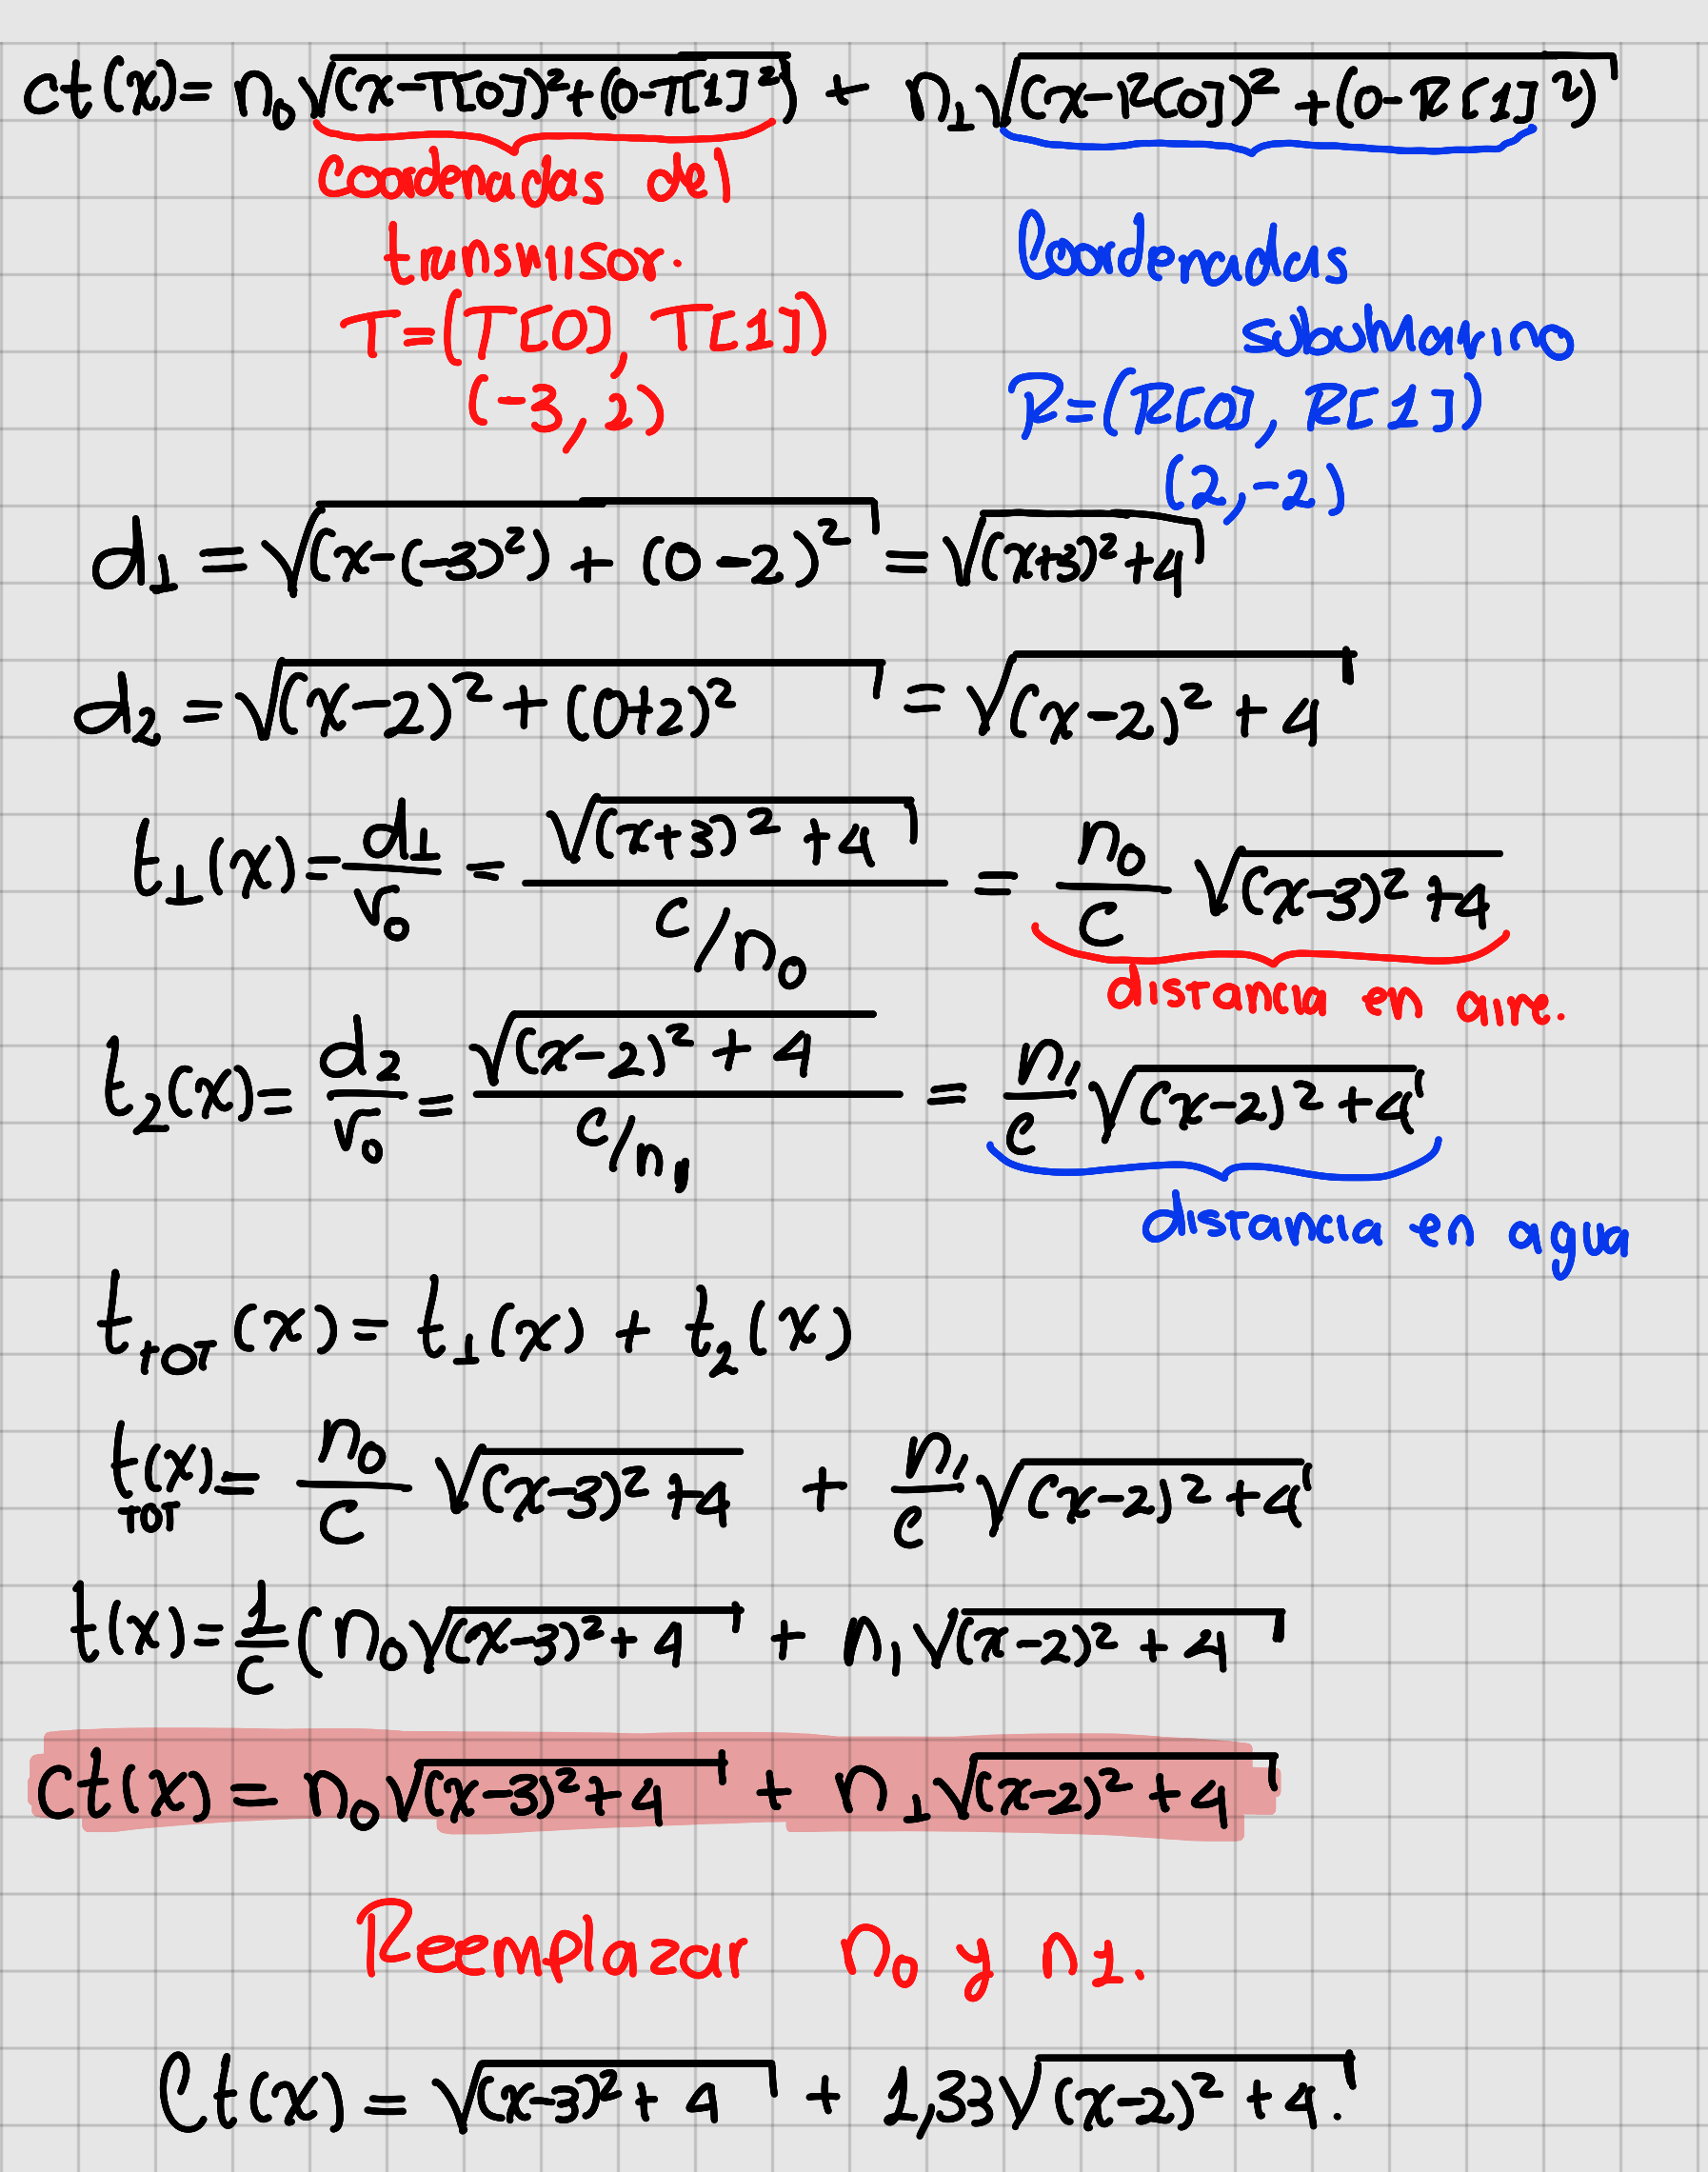

In [40]:

n0 = 1
n1 = 1.33
c = 3e8

def tiempo_total(x):
    d1 = np.sqrt((x + 3)**2 + 4)
    d2 = np.sqrt((x - 2)**2 + 4)
    return n0 * d1 + n1 * d2


x_vals = np.linspace(-5, 5, 500)
y_vals = tiempo_total(x_vals)

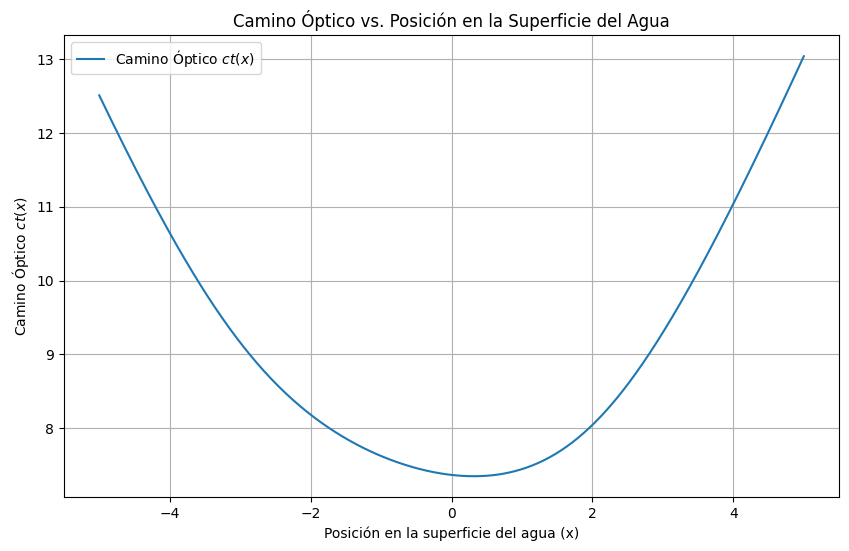

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Camino Óptico $ct(x)$')
plt.xlabel('Posición en la superficie del agua (x)')
plt.ylabel('Camino Óptico $ct(x)$')
plt.title('Camino Óptico vs. Posición en la Superficie del Agua')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
def df(f,x):
  h = 1e-6
  return (f(x+h) - f(x))/h

def ddf(f,x):
  h = 1e-6
  return (f(x+h) - 2*f(x) + f(x-h))/h**2